# Check for overfitting

In [ ]:
#pip install StatisticalAnalysis

In [ ]:
#pip install tabulate

In [1]:
import pandas as pd
from numpy import mean
from numpy import std
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.multioutput import MultiOutputRegressor

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

### Loading datasets and building new ones

In [2]:
dfTrain = pd.read_csv('train.csv', sep=',')
dfTest = pd.read_csv('test.csv', sep=',')

Splitting the Testing data set in two new datasets. Each group has the half of groups (Latitude-Longitude).

In [3]:
gr = dfTest.groupby(['LATITUDE','LONGITUDE'])
gr2 = [gr.get_group(x) for x in gr.groups]
import random
random.seed=15
testingElems = random.sample(range(0,len(gr2)),int(len(gr2)*0.5))
test2Grps = [gr2[i] for i in testingElems]
test1Grps = [gr2[i] for i in range(0,len(gr2)) if i not in testingElems]
test2df = pd.concat(test2Grps)
test1df = pd.concat(test1Grps)

In [4]:
gr = test2df.groupby(['LATITUDE','LONGITUDE']) #checking the number of groups
len(gr)
gr = test1df.groupby(['LATITUDE','LONGITUDE'])
len(gr)

63

Keeping test1 and split the 50% of instances of test2 in two new datasets

In [37]:
test2shuffled=test2df.sample(frac=1).reset_index(drop=True)

In [6]:
# Creating a dataframe with 50%
# values of original dataframe
test2_part_1 = test2shuffled.sample(frac = 0.5)
len(test2_part_1)

556

In [7]:
# Creating dataframe with 
# rest of the 50% values
test2_part_2 = test2shuffled.drop(test2_part_1.index)
len(test2_part_2)

557

Creating the new training dataset with the training-file and the half of instances of the dataset called test2.
The train1 is the train-file + the instances in test2_part2-file.
The train2 is the train-file.

In [8]:
train2=pd.concat([dfTrain,test2_part_2])

In [10]:
train1=dfTrain

Creating the new testing dataset (test2_2) with the data of test1df + test2_part_1

In [12]:
test2_2=pd.concat([test1df,test2_part_1])

### Obtaining the samples and their annotations

In [16]:
Xtrain1,ytrain1 = train1.values[:,0:5],train1.values[:,5:-3]
Xtrain2,ytrain2 = train2.values[:,0:5],train2.values[:,5:-3]
Xtest2,ytest2 = test2_2.values[:,0:5],test2_2.values[:,5:-3]
Xtest1,ytest1 = test1df.values[:,0:5],test1df.values[:,5:-3]

### k-Fold Cross Validation (k=10)

In [17]:
#remove the algorithm "Extra trees": ExtraTreesRegressor(),
ESTIMATORS = {
    "K-nn": KNeighborsRegressor(),                          # Accept default parameters
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, max_depth=30, random_state=2),
    "ExtraTreesRegressor": ExtraTreesRegressor(n_estimators=100, max_depth=30, random_state=2),
    "Decision Tree Regressor":DecisionTreeRegressor(max_depth=5),
    "MultiO/P GBR" :MultiOutputRegressor(GradientBoostingRegressor(n_estimators=5)),
    "MultiO/P AdaB" :MultiOutputRegressor(AdaBoostRegressor(n_estimators=5))
}

### From dataset train1

In [25]:
r2_scores = pd.DataFrame()
nmse_scores = pd.DataFrame()

In [19]:
cv = KFold(n_splits=10, random_state=1)
for name, estimator in ESTIMATORS.items():  
    scores = cross_validate(estimator, Xtrain1, ytrain1, scoring=('r2', 'neg_mean_squared_error'), cv=cv, n_jobs=-1)
    print('%s. r2: %.3f (%.3f)' % (name, mean(scores['test_r2']), std(scores['test_r2'])))
    r2_scores[name]=scores['test_r2'].tolist()
    print('%s. neg_mean_squared_error: %.3f (%.3f)' % (name, mean(scores['test_neg_mean_squared_error']), std(scores['test_neg_mean_squared_error'])))
    nmse_scores[name]=scores['test_neg_mean_squared_error']
    

C:\Users\gamata\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


K-nn. r2: 0.820 (0.028)
K-nn. neg_mean_squared_error: -0.003 (0.001)
Linear regression. r2: 0.338 (0.015)
Linear regression. neg_mean_squared_error: -0.011 (0.001)
Ridge. r2: 0.338 (0.015)
Ridge. neg_mean_squared_error: -0.011 (0.001)
Lasso. r2: 0.162 (0.008)
Lasso. neg_mean_squared_error: -0.016 (0.001)
ElasticNet. r2: 0.182 (0.007)
ElasticNet. neg_mean_squared_error: -0.016 (0.001)
RandomForestRegressor. r2: 0.962 (0.012)
RandomForestRegressor. neg_mean_squared_error: -0.000 (0.000)
ExtraTreesRegressor. r2: 0.973 (0.008)
ExtraTreesRegressor. neg_mean_squared_error: -0.000 (0.000)
Decision Tree Regressor. r2: 0.574 (0.025)
Decision Tree Regressor. neg_mean_squared_error: -0.004 (0.000)
MultiO/P GBR. r2: 0.508 (0.023)
MultiO/P GBR. neg_mean_squared_error: -0.010 (0.000)
MultiO/P AdaB. r2: 0.838 (0.026)
MultiO/P AdaB. neg_mean_squared_error: -0.002 (0.000)


In [20]:
r2_scores=r2_scores.transpose()
r2_scores

,0,1,2,3,4,5,6,7,8,9
K-nn,0.843518,0.794628,0.854584,0.845662,0.832036,0.844899,0.827285,0.765974,0.788044,0.804721
Linear regression,0.323663,0.346763,0.306295,0.352969,0.351944,0.348930,0.337464,0.327520,0.355695,0.330350
Ridge,0.323665,0.346765,0.306304,0.352968,0.351944,0.348931,0.337466,0.327523,0.355696,0.330350
Lasso,0.153787,0.160217,0.167582,0.170861,0.169626,0.164352,0.160160,0.146202,0.170557,0.153296
ElasticNet,0.172558,0.183651,0.184439,0.190346,0.189560,0.185220,0.180284,0.169097,0.190424,0.175373
RandomForestRegressor,0.960686,0.955460,0.984186,0.957784,0.948143,0.958629,0.980704,0.968380,0.963054,0.946722
ExtraTreesRegressor,0.974329,0.963662,0.984643,0.959056,0.970502,0.972863,0.984140,0.966215,0.977279,0.977221
Decision Tree Regressor,0.592398,0.591236,0.550522,0.577642,0.605542,0.513260,0.584255,0.571856,0.568687,0.583400
MultiO/P GBR,0.496796,0.512493,0.497471,0.496343,0.506785,0.485909,0.555739,0.479807,0.504854,0.541797
MultiO/P AdaB,0.827661,0.833145,0.867171,0.834593,0.843220,0.836605,0.858514,0.770130,0.852290,0.857580


In [21]:
r2_scores.to_csv(r'C:\Users\gamata\Documents\004_Proyectos\011_Mares_Edu_y_Jonathan\r2_scores.csv')

r2_scores.csv
['K-nn' 'Linear regression' 'Ridge' 'Lasso' 'ElasticNet'
 'RandomForestRegressor' 'ExtraTreesRegressor' 'Decision Tree Regressor'
 'MultiO/P GBR' 'MultiO/P AdaB']
Report
**********************************************************
Mean and std
**********************************************************
K-nn: 0.820135 (0.028360)
Linear regression: 0.338159 (0.015189)
Ridge: 0.338161 (0.015187)
Lasso: 0.161664 (0.008030)
ElasticNet: 0.182095 (0.007206)
RandomForestRegressor: 0.962375 (0.011754)
ExtraTreesRegressor: 0.972991 (0.007947)
Decision Tree Regressor: 0.573880 (0.024719)
MultiO/P GBR: 0.507799 (0.022600)
MultiO/P AdaB: 0.838091 (0.025762)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using

KeyError: 'regression'

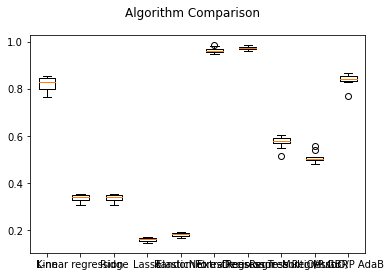

In [22]:
from StatisticalAnalysis import statisticalComparison
statisticalComparison('r2_scores.csv')

### From dataset train2 

In [26]:
r2_scores_2 = pd.DataFrame()
nmse_scores_2= pd.DataFrame()

In [27]:
cv = KFold(n_splits=10, random_state=1)
for name, estimator in ESTIMATORS.items():  
    scores = cross_validate(estimator, Xtrain2, ytrain2, scoring=('r2', 'neg_mean_squared_error'), cv=cv, n_jobs=-1)
    print('%s. r2: %.3f (%.3f)' % (name, mean(scores['test_r2']), std(scores['test_r2'])))
    r2_scores_2[name]=scores['test_r2'].tolist()
    print('%s. neg_mean_squared_error: %.3f (%.3f)' % (name, mean(scores['test_neg_mean_squared_error']), std(scores['test_neg_mean_squared_error'])))
    nmse_scores_2[name]=scores['test_neg_mean_squared_error']

K-nn. r2: 0.759 (0.171)
K-nn. neg_mean_squared_error: -0.002 (0.001)
Linear regression. r2: 0.315 (0.044)
Linear regression. neg_mean_squared_error: -0.011 (0.001)
Ridge. r2: 0.315 (0.044)
Ridge. neg_mean_squared_error: -0.011 (0.001)
Lasso. r2: 0.155 (0.017)
Lasso. neg_mean_squared_error: -0.016 (0.001)
ElasticNet. r2: 0.176 (0.017)
ElasticNet. neg_mean_squared_error: -0.016 (0.001)
RandomForestRegressor. r2: 0.941 (0.059)
RandomForestRegressor. neg_mean_squared_error: -0.000 (0.000)
ExtraTreesRegressor. r2: 0.964 (0.024)
ExtraTreesRegressor. neg_mean_squared_error: -0.000 (0.000)
Decision Tree Regressor. r2: 0.526 (0.085)
Decision Tree Regressor. neg_mean_squared_error: -0.004 (0.000)
MultiO/P GBR. r2: 0.507 (0.017)
MultiO/P GBR. neg_mean_squared_error: -0.010 (0.000)
MultiO/P AdaB. r2: 0.803 (0.056)
MultiO/P AdaB. neg_mean_squared_error: -0.002 (0.000)


In [28]:
r2_scores_2=r2_scores_2.transpose()
r2_scores_2

,0,1,2,3,4,5,6,7,8,9
K-nn,0.841839,0.809573,0.844642,0.734270,0.847348,0.849087,0.766684,0.822140,0.816320,0.257447
Linear regression,0.317710,0.342489,0.354536,0.241484,0.349873,0.329384,0.265242,0.356475,0.348508,0.243129
Ridge,0.317713,0.342491,0.354539,0.241488,0.349875,0.329384,0.265246,0.356475,0.348511,0.243138
Lasso,0.149300,0.159839,0.172305,0.156170,0.167856,0.154632,0.108064,0.166367,0.165570,0.151481
ElasticNet,0.167270,0.182278,0.190052,0.175449,0.188555,0.175728,0.127762,0.188635,0.186147,0.174313
RandomForestRegressor,0.965116,0.958740,0.962063,0.969638,0.944922,0.979887,0.964206,0.970244,0.922976,0.768513
ExtraTreesRegressor,0.974928,0.962250,0.965651,0.959520,0.967975,0.985172,0.974644,0.977139,0.974795,0.894711
Decision Tree Regressor,0.539140,0.588468,0.547251,0.448354,0.581733,0.532341,0.483080,0.602193,0.615373,0.317811
MultiO/P GBR,0.495491,0.508887,0.500974,0.507213,0.510329,0.500390,0.518724,0.493100,0.551704,0.485374
MultiO/P AdaB,0.839846,0.818532,0.821892,0.834983,0.858049,0.822510,0.807707,0.824538,0.749888,0.655449


In [29]:
r2_scores_2.to_csv(r'C:\Users\gamata\Documents\004_Proyectos\011_Mares_Edu_y_Jonathan\r2_scores_2.csv')

r2_scores_2.csv
['K-nn' 'Linear regression' 'Ridge' 'Lasso' 'ElasticNet'
 'RandomForestRegressor' 'ExtraTreesRegressor' 'Decision Tree Regressor'
 'MultiO/P GBR' 'MultiO/P AdaB']
Report
**********************************************************
Mean and std
**********************************************************
K-nn: 0.758935 (0.170931)
Linear regression: 0.314883 (0.044315)
Ridge: 0.314886 (0.044313)
Lasso: 0.155158 (0.017258)
ElasticNet: 0.175619 (0.017498)
RandomForestRegressor: 0.940631 (0.059293)
ExtraTreesRegressor: 0.963679 (0.024107)
Decision Tree Regressor: 0.525574 (0.085251)
MultiO/P GBR: 0.507219 (0.017388)
MultiO/P AdaB: 0.803339 (0.056095)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality usi

KeyError: 'regression'

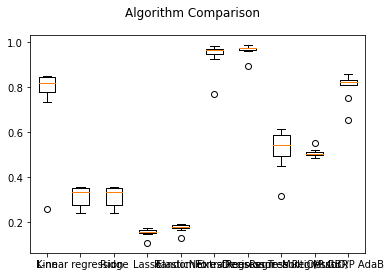

In [30]:
from StatisticalAnalysis import statisticalComparison
statisticalComparison('r2_scores_2.csv')

### Training with the best model for the different training datasets

Building model with train1:

In [31]:
regr_et = ExtraTreesRegressor(n_estimators=100, max_depth=30,
                                random_state=2)
regr_et.fit(Xtrain1, ytrain1)

ExtraTreesRegressor(max_depth=30, random_state=2)

Evaluating the model:

In [32]:
regr_et.score(Xtest1,ytest1)

0.9618962256776254

In [33]:
regr_et.score(Xtest2,ytest2)

0.9587858639066389

Buiding model with train2:

In [34]:
regr_et_2 = ExtraTreesRegressor(n_estimators=100, max_depth=30,
                                random_state=2)
regr_et_2.fit(Xtrain2, ytrain2)

ExtraTreesRegressor(max_depth=30, random_state=2)

In [35]:
regr_et_2.score(Xtest1,ytest1)

0.960305134367017

In [36]:
regr_et_2.score(Xtest2,ytest2)

0.9582362400087965